# Baseline Model

In [12]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

load_dotenv() 

True

# MLflow Tracking Setup

In [ ]:
mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URI"))
mlflow.set_experiment(os.getenv("MLFLOW_EXPERIMENT_NAME"))

# Load Preprocessed Data

In [4]:
df = pd.read_csv('../data/reddit_preprocessed.csv')
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


# Feature Engineering

In [5]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline Randomn Forest

2025/10/22 22:13:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/22 22:13:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/344522020122120746/runs/69058cee520244458104ac2a74ac0e30
🧪 View experiment at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/344522020122120746
Accuracy: 0.6470748670394109
              precision    recall  f1-score   support

          -1       0.91      0.01      0.01      1650
           0       0.68      0.81      0.74      2529
           1       0.62      0.85      0.72      3154

    accuracy                           0.65      7333
   macro avg       0.74      0.56      0.49      7333
weighted avg       0.71      0.65      0.57      7333



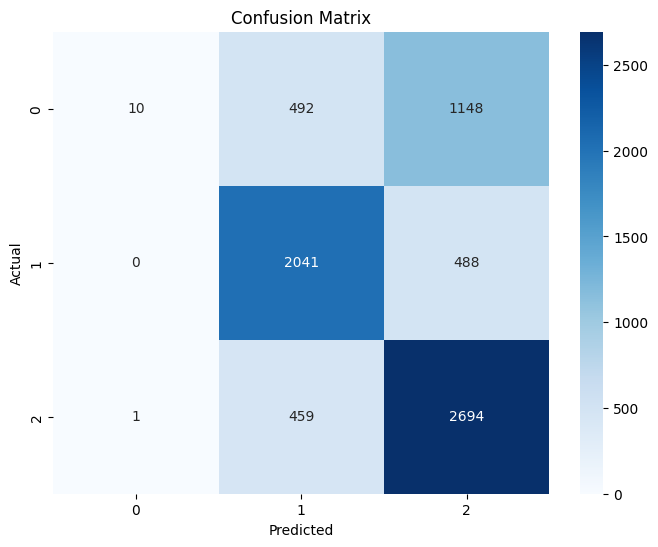

In [9]:
with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW)")
    
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    n_estimators = 200
    max_depth = 15
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Log model
    mlflow.sklearn.log_model(model, name="random_forest_model")

    # Log dataset
    df.to_csv("reddit_preprocessing.csv", index=False)
    mlflow.log_artifact("reddit_preprocessing.csv")

print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))